 
  <img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" 
     style="float: right; margin-right: 30px;" 
     width="120"
     />

 ---
 
 # **OPTIMIZACIÓN: TAREA 1**
 EZAU FARIDH TORRES TORRES.
     
<p align="right"> Maestría en Ciencias con Orientación en Matemáticas Aplicadas. </p>
<p align="right"> CENTRO DE INVESTIGACIÓN EN MATEMÁTICAS. </p>

---

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "dark")


## **Indicaciones**

Puede escribir el código de los algoritmos que se piden en una celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para usarlas en este notebook. Lo importante es que en el notebook aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados, para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales.
- Si todos los códigos para que se requieren para reproducir los resultados están en el notebook, no hace falta comprimir el notebook 
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables para el algoritmo, pero sólo es para facilitar la descripción. En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las funciones. La intención es que tomen en cuenta lo que requiere el algoritmo y que tiene que haber parámetros que permitan controlar el comportamiento del algoritmo, evitando que dejen fijo un valor y que no se puede modificar para hacer diferentes pruebas. Si quieren dar esta información usando un tipo de dato que contenga todos los valores o usar variables por separado, etc., lo pueden hacer y no usen variables globales si no es necesario.

Lo mismo para los valores que devuelve una función. Pueden codificar como gusten la manera en que regresa los cálculos. El punto es que podamos tener acceso a los resultados para poder usarlos, y por eso no es conveniente que la función sólo imprima los valores  sin devolverlos.

Para los ejercicios teóricos puede escribir en la celda la solución, o si escribio la solución en una hoja, puede insertar una(s) foto(s) en la que se vea clara la solución. Si le es más facíl insertar la imagen en un procesador de texto como Word, lo puede utilizar y exportar el documento a PDF y subir el archivo. No lo compacte para que se pueda escribir anotaciones en el PDF.

---

# **1.- Ejercicio 1:**

1. Programar el método de la sección dorada descrito en la diapositiva 9 de la Clase 3. La función que implementa el método recibe como argumentos la función que se va a optimizar, los límites $x_l$ y $x_u$ del intervalo de búsqueda, la tolerancia $\tau>0$, y el número máximo de iteraciones $N$.
   
    La función debe devolver el punto $x_k, f(x_k)$, los extremos del último intervalo de búsqueda $[x_l, x_u]$, el número de iteraciones $k$ realizadas y la variable booleana $bres$ que indica si el algoritmo terminó porque se cumplió el criterio de paso o no.
   
2. Probar el método con las funciones que se describen en las siguientes celdas. 
- Use el intervalo que se especifica en cada caso y $N=50$.
- Use como tolerancie $\tau = \epsilon_m^{1/3}$, donde $\epsilon_m$ es el épsilon de la máquina.
- Imprima $k, x_k, f_k, x_u-x_l$ y $bres$. 

In [2]:
def seccion_dorada(f, x_l, x_u, eps_ = 1e-5, max_iter = 50):
    """
    APLICA EL METODO DE LA SECCION DORADA PARA ENCONTRAR EL MINIMO LOCAL DE LA FUNCION f.
    
    Args:
    - f: funcion a encontrar el minimo.
    - x_l: extremo inferior del intervalo inicial.
    - x_u: extremo superior del intervalo inicial.
    - eps_: tolerancia del metodo (por default 1e-5).
    - max_iter: numero maximo de iteraciones (por default 50).

    Outputs:
    - k: numero de iteraciones de finalizacion.
    - x_k: estimacion del minimo.
    - f(x_k): imagen de la estimacion del minimo.
    - x_u - x_l: longitud del intervalo final [x_l, x_u].
    - bres: variable booleana que indica si el algoritmo convergio o no.
    """
    rho = (np.sqrt(5) - 1) / 2
    for k in range(1, max_iter+1):
        b = rho * (x_u - x_l)
        x_1 = x_u - b
        x_3 = x_l + b
        if f(x_1) < f(x_3):
            x_u = x_3
            x_k = x_1
        if f(x_1) > f(x_3):
            x_l = x_1
            x_k = x_3
        if x_u - x_l < eps_:
            x_k = (x_u + x_l)/2
            print('ITERACIONES:', k)
            print('MINIMIZADOR:', x_k)
            print('SE DA EN:', f(x_k))
            print('E1:', x_u-x_l)
            print('CONVERGENCIA:', True, '\n')
            return k, x_k, f(x_k), x_u-x_l, True
    x_k = (x_u + x_l)/2
    print('ITERACIONES:', k)
    print('MINIMIZADOR:', x_k)
    print('SE DA EN:', f(x_k))
    print('E1:', x_u-x_l)
    print('CONVERGENCIA:', False, '\n')
    return k, x_k, f(x_k), x_u-x_l, False

## **1.1.- Función 1:**

ITERACIONES: 33
MINIMIZADOR: -7.302967811781703
SE DA EN: -35.94915964481166
E1: 5.075371808160867e-06
CONVERGENCIA: True 



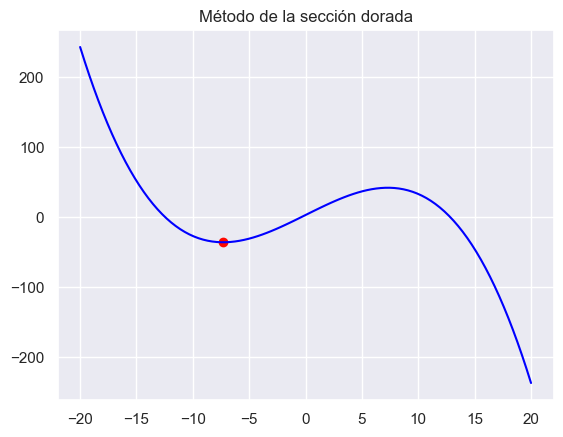

In [3]:
def fnc1(x):
    return -0.05*x**3 + 8*x + 3
xl = -20
xu = 20
xx = np.linspace(xl, xu, 100)
epsilonmaquina = (np.finfo(float).eps)**(1/3)
k1, xk1, fk1, d1, bool1 = seccion_dorada(f = fnc1, x_u = xu, x_l = xl, eps_ = epsilonmaquina)
plt.plot(xx, fnc1(xx), c='#0000FF')
plt.grid(True)
plt.title('Método de la sección dorada')
plt.scatter(xk1, fk1, c = '#FF0800')
plt.show()

## **1.2.- Función 2:**

ITERACIONES: 50
MINIMIZADOR: 0.0
SE DA EN: 2.0
E1: 4
CONVERGENCIA: False 



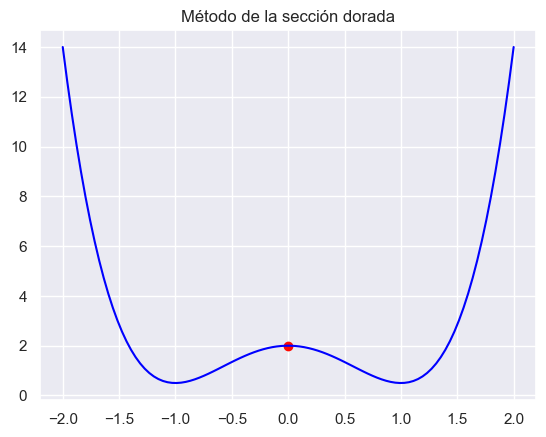

In [4]:
def fnc2(x):
    return 1.5*x**4 - 3*x**2 + 2
xl = -2
xu = 2
xx = np.linspace(xl, xu, 100)
k2, xk2, fk2, d2, bool2 = seccion_dorada(f = fnc2, x_u = xu, x_l = xl, eps_ = epsilonmaquina)
plt.plot(xx, fnc2(xx), c = '#0000FF')
plt.grid(True)
plt.title('Método de la sección dorada')
plt.scatter(xk2, fk2, c = '#FF0800')
plt.show()

## **1.3.- Función 3:**

ITERACIONES: 32
MINIMIZADOR: 0.6795787785094195
SE DA EN: -0.8242393984760517
E1: 4.106062046371761e-06
CONVERGENCIA: True 



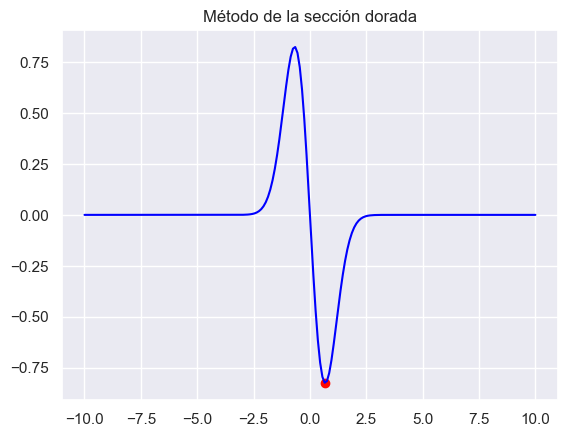

In [5]:
def fnc3(x):
    return -(x + np.sin(x))*np.exp(-x**2)
xl = -10
xu = 10
xx = np.linspace(xl, xu, 200)
k3, xk3, fk3, d3, bool3 = seccion_dorada(f = fnc3, x_u = xu, x_l = xl, eps_ = epsilonmaquina)
plt.plot(xx, fnc3(xx), c = '#0000FF')
plt.grid(True)
plt.title('Método de la sección dorada')
plt.scatter(xk3, fk3, c = '#FF0800')
plt.show()

---

# **2.- Ejercicio 2:**

La función de Griewangk en $\mathbb{R}^2$ se define como

$$ f(\mathbf{x}) = f(x_1,x_2) = \frac{x^2_1 + x^2_2}{4000} - \cos(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) + 1 $$

Dado el punto $\mathbf{x}_k$ y la dirección $\mathbf{d}_k$, definimos la función $g(t; \mathbf{x}_k, \mathbf{d}_k) = f(\mathbf{x}_k + t\mathbf{d}_k)$.

## **2.1.**
Programe las funciones  $f(\mathbf{x})$ y $g(t; \mathbf{x}_k, \mathbf{d}_k)$.

In [6]:
def f(x: np.array):
    return (x[0]**2 + x[1]**2) / 4000 - np.cos(x[0])*np.cos(x[1]/np.sqrt(2)) + 1
def g(t: float, xk: np.array, dk: np.array):
    return f(xk + t*dk)

## **2.2.**
Calcule de manera analítica el gradiente de $f(\mathbf{x})$ y programe la función correspondiente.

>\begin{align*}
    > \nabla f(\mathbf{x}) &= \left( \frac{\partial f}{\partial x_{1}}, \frac{\partial f}{\partial x_{2}} \right)\\
    > & = \left( \frac{x_{1}}{2000} + \sin(x_{1})\cos\left(\frac{x_{2}}{\sqrt{2}}\right), \frac{x_{2}}{2000} + \frac{1}{\sqrt{2}} \cos({x_{1}}) \sin\left(\frac{x_{2}}{\sqrt{2}}\right) \right)
>\end{align*}

In [7]:
def gradf(x: np.array):
    gradf1 = x[0] / 2000 + np.sin(x[0])*np.cos(x[1]/np.sqrt(2))
    gradf2 = x[1] / 2000 + (np.cos(x[0])*np.sin(x[1]/np.sqrt(2))) / np.sqrt(2)
    return [gradf1, gradf2]

## **2.3.**
Sean $\mathbf{x}_0 = (3,0.5)$, $\mathbf{d}_0 = \mathbf{p}/\|\mathbf{p}\|$, donde $\mathbf{p} = (2,1)$, y $\mathbf{g}_0 = \nabla f(\mathbf{x}_0)/\|\nabla f(\mathbf{x}_0)\|$. Calcule el valor de la derivada direccional de $f$ en $\mathbf{x}_0$ en la dirección $\mathbf{d}_0$ y en la dirección $-\mathbf{g}_0$. Imprima estos valores.

In [8]:
x0 = np.array([3,0.5], dtype = 'float')
p = np.array([2,1], dtype = 'float')
d0 = p / np.linalg.norm(p)
g0 = gradf(x0) / np.linalg.norm(gradf(x0))

La derivada direccional de $f$ en $\mathbf{x}_0$ en la dirección $\mathbf{d}_0$ es:
$$
    \frac{\partial f(\mathbf{x}_{0})}{\partial \mathbf{d}_{0}} = \nabla f(\mathbf{x}_0)^{T} \cdot \mathbf{d}_{0}
$$
Esto es:

In [9]:
print('La derivada direccional es:', np.dot(gradf(x0), d0))

La derivada direccional es: 0.011475034596120023


La derivada direccional de $f$ en $\mathbf{x}_0$ en la dirección $-\mathbf{g}_0$ es:
$$
    \frac{\partial f(\mathbf{x}_{0})}{\partial (-\mathbf{g}_{0})} = \nabla f(\mathbf{x}_0)^{T} \cdot (-\mathbf{g}_{0})
$$
Esto es:

In [10]:
print('La derivada direccional es:', np.dot(gradf(x0), -g0))

La derivada direccional es: -0.27667848944420204


## **2.4.**
Genere una gráfica que muestre  la gráfica de $g(t; \mathbf{x}_0, \mathbf{d}_0)$ y $g(t; \mathbf{x}_0, -\mathbf{g}_0)$ para $t \in [0,2]$.

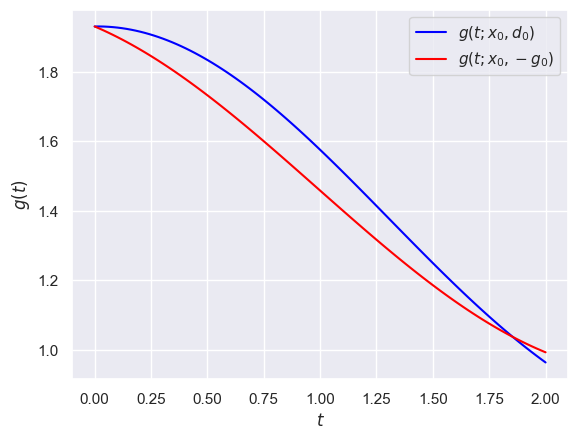

In [11]:
x_val = np.linspace(0, 2, 100)
    
gd0_vals = [g(t, xk = x0, dk = d0) for t in x_val]
gg0_vals = [g(t, xk = x0, dk = -g0) for t in x_val]
plt.plot(x_val, gd0_vals, label = '$g(t; x_0, d_0)$', c = '#0000FF')
plt.plot(x_val, gg0_vals, label = '$g(t; x_0, -g_0)$', c = '#FF0000')
plt.xlabel('$t$')
plt.ylabel('$g(t)$')
plt.legend()
plt.grid(True)
plt.show()

## **2.5.**
Aplique el método de la sección dorada para minimizar la función $g(t; \mathbf{x}_0, -\mathbf{g}_0)$ en el intervalo $[0, 2]$. Si $t_0$ es el minimizador y $\mathbf{x}_1 = \mathbf{x}_0 - t_0\mathbf{g}_0$, imprima $\mathbf{x}_0$, $f(\mathbf{x}_0)$, $t_0$, $\mathbb{x}_1$, $f(\mathbf{x}_1)$.

In [12]:
xl = 0
xu = 2
xx = np.linspace(xl, xu, 100)
k4, xk4, fk4, d4, bool4 = seccion_dorada(f = lambda t: g(t, xk = x0, dk = -g0), x_u = xu, x_l = xl, eps_ = epsilonmaquina)

x1 = x0 - xk4*g0

print('x0 =', x0)
print('f(x0) =', f(x0))
print('El minimizador t0 es:', xk4)
print('x1 =', x1)
print('f(x1) =', f(x1))

ITERACIONES: 27
MINIMIZADOR: 1.9999977231537054
SE DA EN: 0.9932408571275421
E1: 4.553692589448488e-06
CONVERGENCIA: True 

x0 = [3.  0.5]
f(x0) = 1.9310723123875322
El minimizador t0 es: 1.9999977231537054
x1 = [2.0321521  2.25021751]
f(x1) = 0.9932408571275421


## **2.6.**
Repita los puntos 4 y 5 usando el intervalo $[0,8]$.

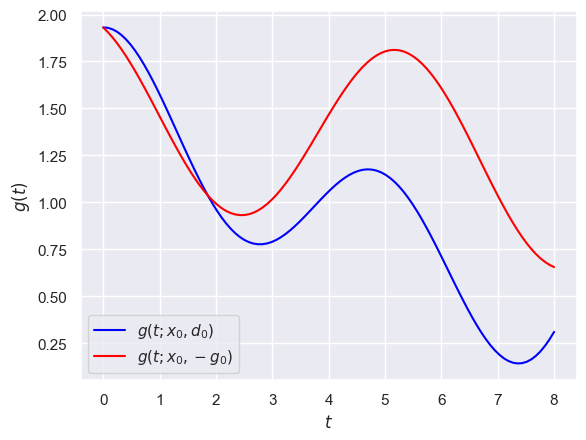

In [13]:
x_val = np.linspace(0, 8, 100)
    
gd0_vals = [g(t, xk = x0, dk = d0) for t in x_val]
gg0_vals = [g(t, xk = x0, dk = -g0) for t in x_val]
plt.plot(x_val, gd0_vals, label = '$g(t; x_0, d_0)$', c = '#0000FF')
plt.plot(x_val, gg0_vals, label = '$g(t; x_0, -g_0)$', c = '#FF0000')
plt.xlabel('$t$')
plt.ylabel('$g(t)$')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
xl = 0
xu = 8
xx = np.linspace(xl, xu, 100)
k5, xk5, fk5, d5, bool5 = seccion_dorada(f = lambda t: g(t, xk = x0, dk = -g0), x_u = xu, x_l = xl, eps_ = epsilonmaquina)

x1 = x0 - xk5*g0

print('x0 =', x0)
print('f(x0) =', f(x0))
print('El minimizador t0 es:', xk5)
print('x1 =', x1)
print('f(x1) =', f(x1))

ITERACIONES: 30
MINIMIZADOR: 2.4561055301295007
SE DA EN: 0.931558786396538
E1: 4.299923999084854e-06
CONVERGENCIA: True 

x0 = [3.  0.5]
f(x0) = 1.9310723123875322
El minimizador t0 es: 2.4561055301295007
x1 = [1.81143035 2.6493619 ]
f(x1) = 0.931558786396538


---

# **3.- Ejercicio 3:**

Sean $\mathbf{a}, \mathbf{b} \in \mathbb{R}^n$. Calcule el gradiente y la Hessiana de la función  $f(\mathbf{x}) = (\mathbf{a}^\top \mathbf{x})(\mathbf{b}^\top \mathbf{x})$.

### **Solución:**

>Sea $\mathbf{x}\in\mathbb{R}^n$. <br>
>Gracias a la aplicación de la regla de la cadena, se tiene que la $i$-ésima componente del gradiente es:
>\begin{align*}
>\nabla f(\mathbf{x})_{i} &= \frac{\partial f}{\partial x_{i}}= \frac{\partial }{\partial x_{i}} \left[ \left( \sum_{k=1}^{n} a_{k}x_{k} \right) \cdot \left( \sum_{k=1}^{n} b_{k}x_{k} \right) \right]\\
>& = a_{i} \cdot \left( \sum_{k=1}^{n} b_{k}x_{k} \right) + b_{i} \cdot \left( \sum_{k=1}^{n} a_{k}x_{k} \right).\\
>\end{align*}
>Esto es, la $i$-ésima entrada del vector $\mathbf{a}$ por al producto escalar de $\mathbf{b}$ con $\mathbf{x}$ más la $i$-ésima entrada del vector $\mathbf{b}$ por al producto escalar de $\mathbf{a}$ con $\mathbf{x}$. Matricialmente:
>$$
>\nabla f(\mathbf{x})= \mathbf{a}(\mathbf{b}^{T} \mathbf{x}) + \mathbf{b}(\mathbf{a}^{T} \mathbf{x}).
>$$
> De forma similar, la entrada $(i,j)$ de la matriz Hessiana $\mathcal{H}$ está dada por:
>\begin{align*}
>\mathcal{H}_{i,j} &= \frac{\partial^{2} f}{ \partial x_{i} \partial x_{j}} = \frac{\partial}{\partial x_{i}}  \left[ a_{j} \cdot \left( \sum_{k=1}^{n} b_{k}x_{k} \right) + b_{j} \cdot \left( \sum_{k=1}^{n} a_{k}x_{k} \right) \right]\\
> & = a_{j} b_{i} + b_{j} a_{i}.
>\end{align*}
> Matricialmente:
>$$
>\mathcal{H} = \mathbf{a} \mathbf{b}^{T} + \mathbf{b} \mathbf{a}^{T}.
>$$

---

# **4.- Ejercicio 4:**

Se tienen los valores de la derivada direccional $\frac{\partial f}{\partial \mathbf{p}_i}$ de $f$ en el punto $\mathbf{x}_0$ para tres direcciones $\mathbf{p}_i$:

$$ \frac{\partial f}{\partial \mathbf{p}_1}(\mathbf{x}_0) = \frac{3}{\sqrt{2}} \quad \text{para} \quad \mathbf{p}_1 = \left(0,\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}} \right)^\top,
$$
$$
\frac{\partial f}{\partial \mathbf{p}_2}(\mathbf{x}_0) = \frac{1}{\sqrt{2}} \quad \text{para} \quad \mathbf{p}_2 = \left(\frac{1}{\sqrt{2}},0,\frac{1}{\sqrt{2}} \right)^\top,
$$
$$
\frac{\partial f}{\partial \mathbf{p}_3}(\mathbf{x}_0) = -\frac{1}{\sqrt{2}} \quad \text{para} \quad \mathbf{p}_3 = \left(\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}},0 \right)^\top.
$$

A partir de esto, calcule el vector gradiente $\nabla f(\mathbf{x}_0)$.

### **Solución:**

> Sabemos que la derivada direccional de $f$ en $\mathbf{x}_{0}$ en la dirección $\mathbf{p}$ está dada por $\nabla f(\mathbf{x}_0)^{T} \mathbf{p}$. En este caso, el gradiente $\nabla f(\mathbf{x}_0) = (x,y,z) \in \mathbb{R}^{3}$ es desconocido y se tienen los datos:
>$$
\nabla f(\mathbf{x}_0)^{T} \mathbf{p}_{1} = (x,y,z)^{T}
\begin{pmatrix}
    0 \\
    \frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}} \\
\end{pmatrix}
= \frac{3}{\sqrt{2}}
>$$
>$$
\nabla f(\mathbf{x}_0)^{T} \mathbf{p}_{2} = (x,y,z)^{T}
\begin{pmatrix}
    \frac{1}{\sqrt{2}} \\
    0 \\
    \frac{1}{\sqrt{2}} \\
\end{pmatrix}
= \frac{1}{\sqrt{2}}
>$$
>$$
\nabla f(\mathbf{x}_0)^{T} \mathbf{p}_{3} = (x,y,z)^{T}
\begin{pmatrix}
    \frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}} \\
    0 \\
\end{pmatrix}
= -\frac{1}{\sqrt{2}}
>$$
>Generando, entonces, un sistema de ecuaciones que $x,y$ y $z$ deben satisfacer, el cual es equivalente a:
>$$
(x,y,z)^{T}
\begin{pmatrix}
    0 \\
    1 \\
    1 \\
\end{pmatrix}
= 3
>$$
>$$
(x,y,z)^{T}
\begin{pmatrix}
    1\\
    0 \\
    1 \\
\end{pmatrix}
= 1
>$$
>$$
(x,y,z)^{T}
\begin{pmatrix}
    1 \\
    1 \\
    0 \\
\end{pmatrix}
= -1
>$$
> Matricialmente:
>$$
\begin{pmatrix}
    0 & 1 & 1 \\
    1 & 0 & 1 \\
    1 & 1 & 0 \\
\end{pmatrix}
\begin{pmatrix}
    x \\
    y \\
    z \\
\end{pmatrix}
=
\begin{pmatrix}
    3 \\
    1 \\
    -1 \\
\end{pmatrix}
>$$
>Cuya solución se obtiene a continuación:

In [15]:
A = np.array([
            [0, 1, 1],
            [1, 0, 1],
            [1, 1, 0]], dtype = 'float')
b = np.array([3,1,-1], dtype = 'float')
x = np.linalg.solve(A,b)
print('La solución es:', x)

La solución es: [-1.5  0.5  2.5]


>Por lo tanto, el gradiente de $f$ en $\mathbf{x}_0$ está dado por:
>$$
\nabla f(\mathbf{x}_0) = \frac{1}{2}
\begin{pmatrix}
    -3 \\
    1 \\
    5 \\
\end{pmatrix}.
>$$